# Setting up for Text Analysis: Imports and Preparations

In [73]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns  
import nltk
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score


# Exploring Amazon Data: An Initial Look at Product Reviews


In [2]:
df=pd.read_csv("amazon data.csv")
predict_data=pd.read_csv("predict amazon.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
2,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
3,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...
4,39,B001EO5QW8,A2GHZ2UTV2B0CD,JERRY REITH,0,0,4,1350777600,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...


In [3]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30365 entries, 0 to 30364
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      30365 non-null  int64 
 1   ProductId               30365 non-null  object
 2   UserId                  30365 non-null  object
 3   ProfileName             30362 non-null  object
 4   HelpfulnessNumerator    30365 non-null  int64 
 5   HelpfulnessDenominator  30365 non-null  int64 
 6   Score                   30365 non-null  int64 
 7   Time                    30365 non-null  int64 
 8   Summary                 30365 non-null  object
 9   Text                    30365 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.3+ MB


In [127]:
# Display the dimensions (number of rows and columns) of the DataFrame
df.shape

(30365, 11)

In [5]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               3
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [6]:
# Count the number of duplicated rows in the DataFrame
duplicated_count = df.duplicated().sum()
print("Number of duplicated rows:", duplicated_count)

Number of duplicated rows: 0


In [7]:
for i in df.select_dtypes(include="object").columns: #identifying garbage value
    print(df[i].value_counts())
    print("***" * 10)

ProductId
B005HG9ESG    179
B007JFXWRC    174
B005ZBZLT4    132
B008I1XPKA    128
B007R900WA    121
             ... 
B001EO5Y5M      1
B001E5E2L8      1
B004WZ4EW4      1
B001MUNAJK      1
B004BY23I8      1
Name: count, Length: 17291, dtype: int64
******************************
UserId
A36WGHR8TO5DKT    51
AY12DBB0U420B     27
A3HON67T38XCB5    26
A2GEZJHBV92EVR    25
AY1EF0GOH80EK     23
                  ..
A1TOP3H49Y5T27     1
A35OGHKUSMOOTO     1
AM0Y9AV0E6CRY      1
A9GVD7K3TPCT3      1
A2B07RJZVDUJA5     1
Name: count, Length: 25179, dtype: int64
******************************
ProfileName
Goldwave "shopper"    51
Pen Name              33
Linda                 29
Gary Peterson         27
Jessica               27
                      ..
Little Mack            1
Liza Miller            1
Alexis Coxon           1
CinGRMN                1
P. Mase                1
Name: count, Length: 22970, dtype: int64
******************************
Summary
Delicious                              158


In [8]:
df.describe() #descriptve statistics 

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,30365.000000,30365.000000,30365.000000,30365.000000,3.036500e+04
mean,265590.429508,0.166606,0.235534,4.139272,1.348845e+09
std,166700.992678,0.754474,1.035299,1.360348,1.430755e+06
min,2.000000,0.000000,0.000000,1.000000,1.346371e+09
25%,115022.000000,0.000000,0.000000,4.000000,1.347581e+09
50%,255069.000000,0.000000,0.000000,5.000000,1.348877e+09
75%,410634.000000,0.000000,0.000000,5.000000,1.350086e+09
max,568421.000000,34.000000,72.000000,5.000000,1.351210e+09


In [9]:
# Generate descriptive statistics for object columns
df.describe(include="object")

,ProductId,UserId,ProfileName,Summary,Text
count,30365,30365,30362,30365,30365
unique,17291,25179,22970,25625,30357
top,B005HG9ESG,A36WGHR8TO5DKT,"Goldwave ""shopper""",Delicious,Nespresso makes GREAT coffee and GREAT machine...
freq,179,51,51,158,2


# Removing the outlier from the dataset

In [128]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=np.number)
# Calculate Z-scores for each numerical column to identify outliers
z_scores = np.abs((numerical_columns - numerical_columns.mean()) / numerical_columns.std())
# Define the threshold for outlier detection
threshold = 3
# Identify outliers based on whether any Z-score exceeds the threshold
outliers = (z_scores > threshold).any(axis=1)
# Create a cleaned DataFrame by removing rows containing outliers
df_clean = df[~outliers]
# Print the shapes of the original and cleaned DataFrames to compare
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_clean.shape)

Original DataFrame shape: (30365, 11)
Cleaned DataFrame shape: (30024, 11)


C:\Users\huawei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


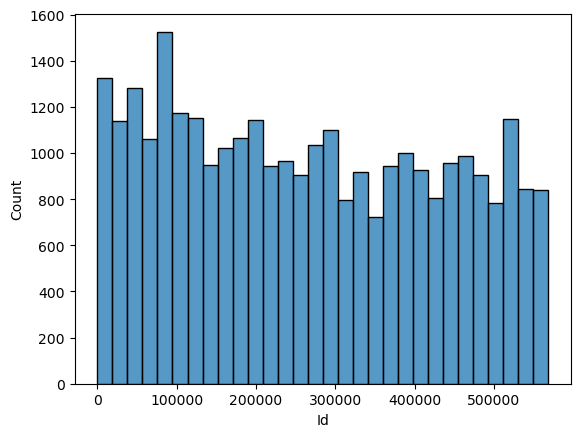

C:\Users\huawei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


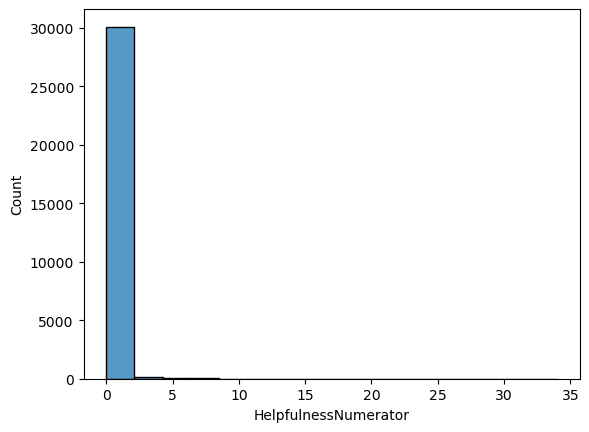

C:\Users\huawei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


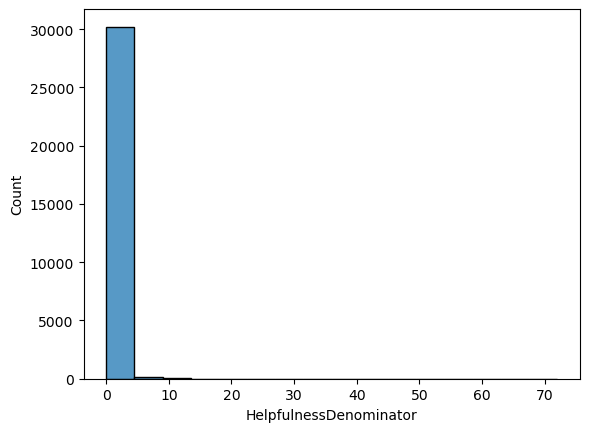

C:\Users\huawei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


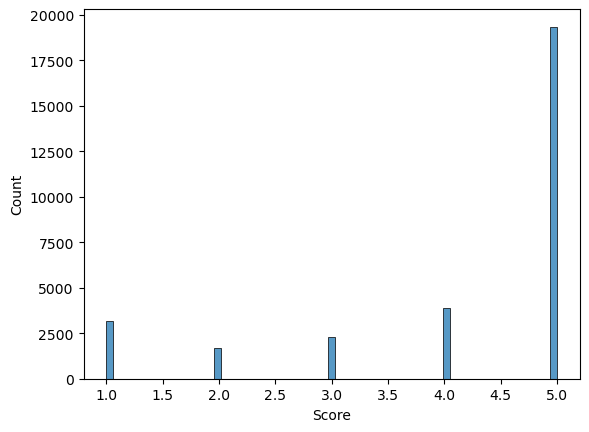

C:\Users\huawei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


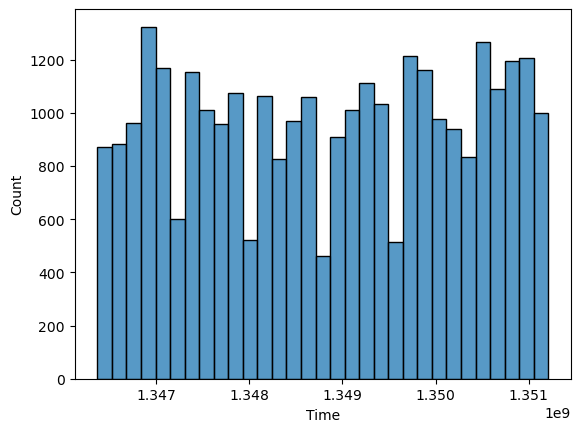

In [129]:
# Iterate over numerical columns in the DataFrame
for i in df.select_dtypes(include="number").columns:
    # Plot a histogram to understand the distribution of numerical data
    sns.histplot(data=df, x=i)
    plt.show()  # Show the plot

# Histogram of overall ratings
Visualize the distribution of overall ratings to understand the distribution of ratings given by reviewers

C:\Users\huawei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


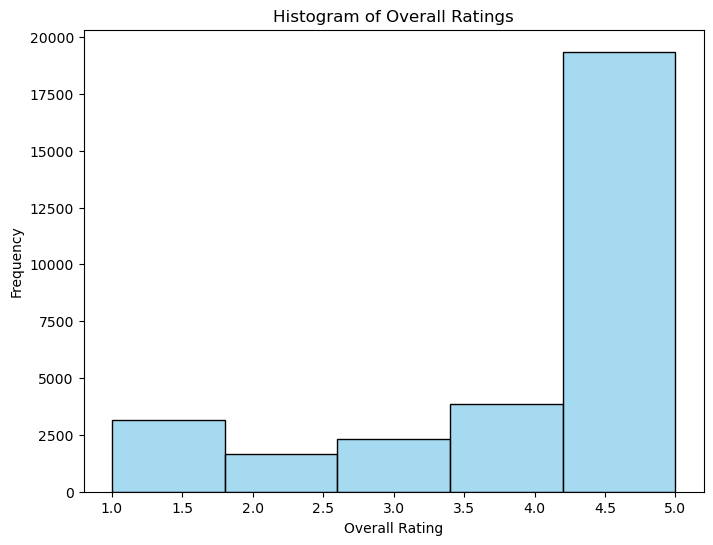

In [130]:
# Plot histogram of overall ratings
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(df['Score'], bins=5, kde=False, color='skyblue')  # Plot the histogram
plt.title('Histogram of Overall Ratings')  # Set the title of the plot
plt.xlabel('Overall Rating')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Show the plot

# # Bar plot of Top 10 reviewers

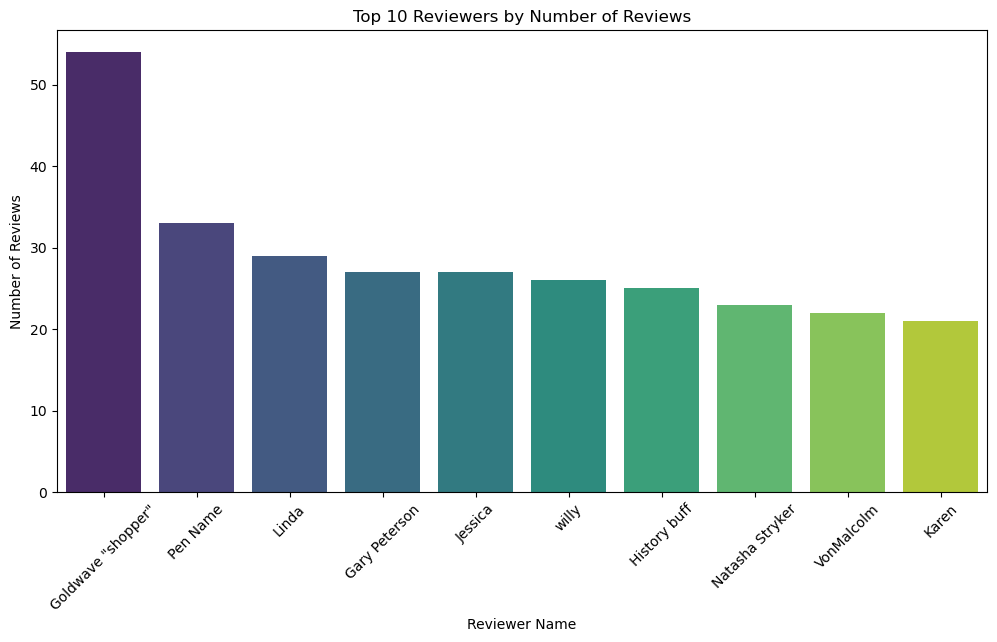

In [131]:
# Plot bar plot of reviewerName
plt.figure(figsize=(12, 6))  # Set the figure size
sns.countplot(data=df, x='ProfileName', order=df['ProfileName'].value_counts().index[:10], palette='viridis')  # Plot the bar plot
plt.title('Top 10 Reviewers by Number of Reviews')  # Set the title of the plot
plt.xlabel('Reviewer Name')  # Set the label for the x-axis
plt.ylabel('Number of Reviews')  # Set the label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()  # Show the plot

#  Heatmap of Numerical Variables

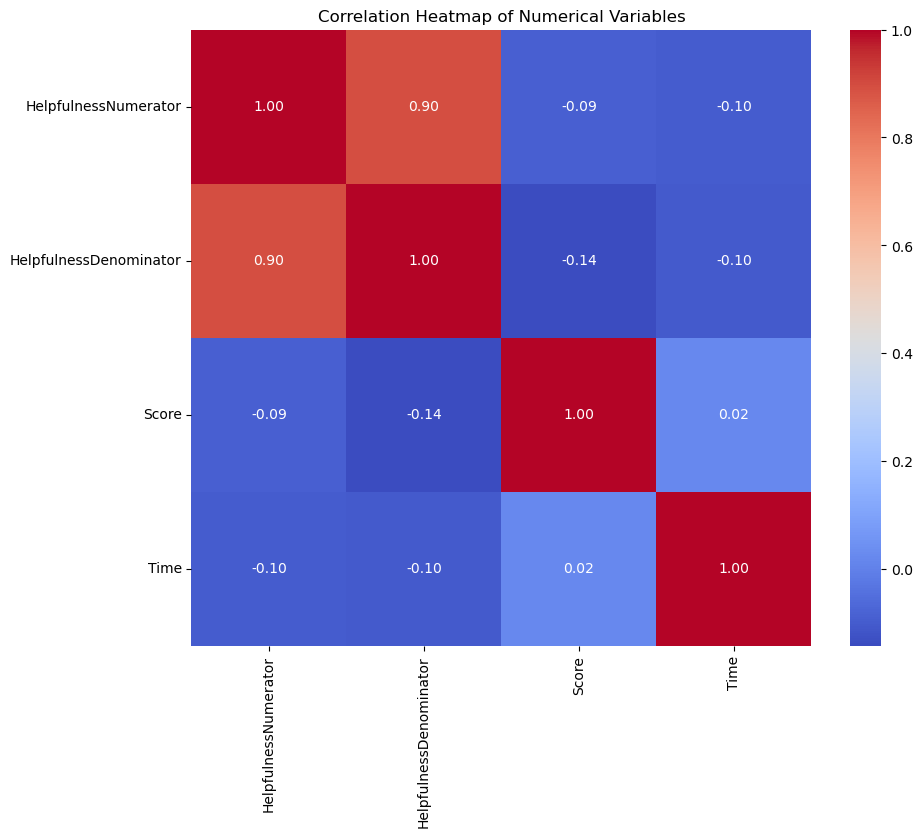

In [132]:
# Select numerical columns for correlation analysis
numerical_columns = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()
# Plot heatmap to visualize correlations
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Plot the heatmap with annotations
plt.title('Correlation Heatmap of Numerical Variables')  # Set the title of the plot
plt.show()  # Show the plot

# # Word cloud of reviewText
Create a word cloud to visualize the most frequent words or phrases used in the review texts, which can provide insights into common themes or sentiments.

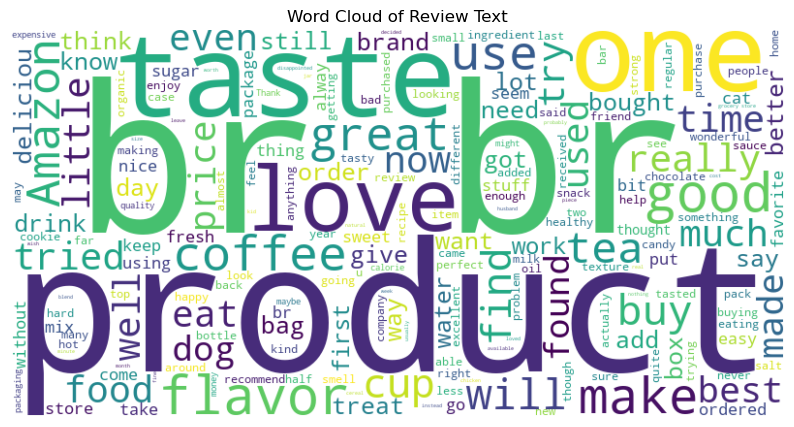

In [23]:
text = ' '.join(review for review in df['Text'])
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the generated word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Review Text')
plt.axis('off')
plt.show()

# Handling the missing values 

In [29]:
# Replace missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include="object").columns
for column in categorical_columns:
    mode_value = df[column].mode()[0]
# Replace chained assignment with inplace method
# Replace chained assignment with inplace method
df[column].fillna({column: mode_value}, inplace=True)

C:\Users\huawei\AppData\Local\Temp\ipykernel_3180\1692416447.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna({column: mode_value}, inplace=True)


In [30]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

# Encoding of Data


In [33]:
# Define TF-IDF vectorizer parameters to reduce memory usage
max_features = 10000  # Maximum number of features
max_df = 0.95         # Ignore terms that appear in more than 95% of the documents
min_df = 2            # Ignore terms that appear in fewer than 2 documents

# Initialize TF-IDF vectorizer with specified parameters
tfidf_vectorizer = TfidfVectorizer(max_features=max_features, max_df=max_df, min_df=min_df)

# Fit and transform the 'Text' column
text_tfidf = tfidf_vectorizer.fit_transform(df['Text'])

# Convert the TF-IDF matrix into a DataFrame
df_text_encoded = pd.DataFrame(text_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the encoded 'Text' DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(columns=['Text']), df_text_encoded], axis=1)

# Print the head of the encoded DataFrame to verify the encoding
print(df_encoded.head())


   Id   ProductId          UserId                    ProfileName  \
0   2  B00813GRG4  A1D87F6ZCVE5NK                         dll pa   
1   5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
2  10  B00171APVA  A21BT40VZCCYT4                  Carol A. Reed   
3  17  B001GVISJM  A3KLWF6WQ5BNYO                 Erica Neathery   
4  39  B001EO5QW8  A2GHZ2UTV2B0CD                    JERRY REITH   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      1  1346976000   
1                     0                       0      5  1350777600   
2                     0                       0      5  1351209600   
3                     0                       0      2  1348099200   
4                     0                       0      4  1350777600   

                         Summary   00  ...  ziploc  ziplock  zipper  zoe  \
0              Not as Advertised  0.0  ...     0.0      0.0     0.0  0.0   
1                 

#  Distribution of Ratings

In [35]:
#the frequency of each unique value in the 'Score' column of the DataFrame
df['Score'].value_counts()

Score
5    19354
4     3874
1     3162
3     2311
2     1664
Name: count, dtype: int64

# Data Preprocessing and Label Generation

In [37]:
# replace â€™ with '
df["Text"] = df["Text"].apply(lambda x: x.replace("â€™","'"))
df["Text"] = df["Text"].apply(lambda x: x.replace("&amp","&"))

In [39]:
# Let's initialize the "Label" column by naively setting them all to be positive...
review_count = df.shape[0]
df["Label"] = ['positive']*review_count

In [43]:
# The label is positive when the rating is 4 or 5, and negative when the rating is 1 or 2.
positive_indices = df.loc[df["Score"].isin([4,5]), "Score"].index
negative_indices = df.loc[df["Score"].isin([1,2]), "Score"].index
df.loc[positive_indices, "Label"] = 'positive'
df.loc[negative_indices, "Label"] = 'negative'

In [45]:
# Summarize amazon reviews dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30365 entries, 0 to 30364
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      30365 non-null  int64 
 1   ProductId               30365 non-null  object
 2   UserId                  30365 non-null  object
 3   ProfileName             30365 non-null  object
 4   HelpfulnessNumerator    30365 non-null  int64 
 5   HelpfulnessDenominator  30365 non-null  int64 
 6   Score                   30365 non-null  int64 
 7   Time                    30365 non-null  int64 
 8   Summary                 30365 non-null  object
 9   Text                    30365 non-null  object
 10  Label                   30365 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.5+ MB


In [47]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive
2,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,positive
3,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,negative
4,39,B001EO5QW8,A2GHZ2UTV2B0CD,JERRY REITH,0,0,4,1350777600,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,positive


In [48]:
df.shape

(30365, 11)

# distribution of sentiments

In [49]:
# distribution of sentiments
sentiment_counts = df["Label"].value_counts()
sentiment_counts

Label
positive    25539
negative     4826
Name: count, dtype: int64

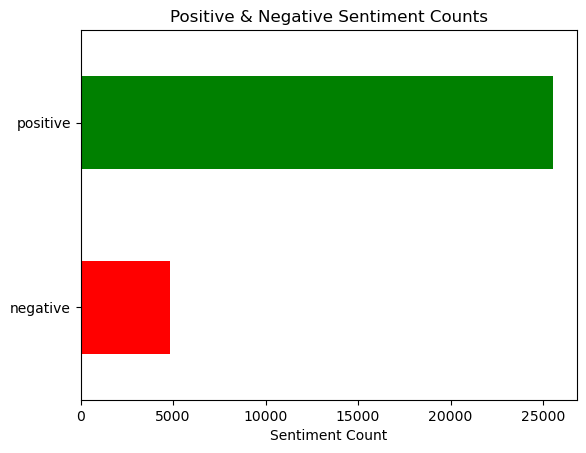

In [133]:
# Create a horizontal bar plot of sentiment counts
sentiment_count_plot = sentiment_counts.sort_values().plot(kind="barh", color=['red', 'green'])
# Hide the y-axis label
sentiment_count_plot.yaxis.label.set_visible(False)
# Set the x-axis label
sentiment_count_plot.set_xlabel("Sentiment Count")
# Set the title of the plot
sentiment_count_plot.set_title("Positive & Negative Sentiment Counts")
# Show the plot
plt.show()

In [51]:
# ratio of negative reviews
# ratio of negative reviews
4826/(4826 + 23228)

0.1720253796250089

In [52]:
# ratio of positve reviews
23228/(4826 + 23228)

0.8279746203749911

In [53]:
#Accessing the text in the 7th row of the "Text" column
df.loc[6, "Text"]

"We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time).  The smell is wonderful and the roasted beans taste delicious too.  More importantly, the coffee is smooth; no bitter aftertaste.  On numerous occasions, we've had to send the roasted beans home with friends because they like it so much."

In [54]:
# Accessing the text in the 11th row of the "Text" column
df.loc[10, "Text"]

"Great food! I love the idea of one food for all ages & breeds. Ît's a real convenience as well as a really good product.  My 3 dogs eat less, have almost no gas, their poop is regular and a perfect consistency, what else can a mom ask for!!"

# Text Cleaning Function Using Regular Expressions


In [55]:
import re

# define a function to clean a text
# I used regex101.com to test my regular expressions before use.
def clean_text(text):
    
    # remove hyper-links
    text = re.sub(r"https:[\S]+", " ", text)
    
    # remove unnecessary text explanations within brackets
    text = re.sub(r"\(([^)]+)", " ", text)
    
    # remove html tags? not sure why there are html tags in some of the text
    # but removing them nonetheless
    text = re.sub(r"\<([^>]+)", " ", text)
    
    # remove any numbers or fractions or brackets or years representation of dates
    text = re.sub(r"[(\d\/)]+ | [\d]+\S", " ", text)

    # remove new line characters (\n)
    text = re.sub(r"\\n"," ", text)
    
    # remove any weird characters
    text = re.sub(r"[^A-Za-z']+", " ", text)
        
    # remove unnecessary whitespace
    text = re.sub(r"\s{2,}", " ", text)
        
    # convert text to lowercase
    text = text.lower().strip()
    
    return text

In [56]:
# clean the text within the dataset using the clean_text(text) function
df["Text"] = df["Text"].apply(clean_text)

In [58]:
# verify that the clean text method worked as intended
df.loc[10, "Text"]

"great food i love the idea of one food for all ages breeds t's a real convenience as well as a really good product my dogs eat less have almost no gas their poop is regular and a perfect consistency what else can a mom ask for"

#  Logistic Regression Text Classifier
Build a Logistic Regression Text Classifier to categorize whether a text review has positive or negative sentiment
70% of the reviews will be used for training while the remaining 30% will be used for testing
List out the steps taken to build the model



# Steps to Building the Model

* **Step 1:** Split the sampled data into train and test set. <br>
* **Step 2:** Represent the dataset text reviews as a numeric vector using Bag of Words (BOW) to extract text features. <br>
* **Step 3:** Build and train the Logistic Regression model (that uses a maximum likelihood learning algorithm) using the data features in training set, then use the model to make predictions on the sentiment for the data in test set based on the test data features.

# Train-Test Split

We need to first split the data into train and test set. Train set data will be used to develop a text classification model and test set data will be used to evaluate the model later on.

In [134]:
import numpy as np
from sklearn.model_selection import train_test_split

# define random state to make random processes reproducible
random_state = np.random.RandomState(0)

In [135]:
# Define X(features) and y(target)
X = df["Text"]
y = df["Label"]

# 70% of the reviews should be used for training and the remaining 30% for the testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)

# Converting Text into Bag of Words (BOW) Representation

In [136]:
# define stop words and also add custom stop words such as 'product'
stop_words = stopwords.words('english')
# stop_words.extend(['food', 'product', 'foods', 'amazon']) ...to extend?
# stop_words.extend(['excited', 'guess', 'away', 'stick'])

# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all texts will be excluded in the BOW
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)

# fit the vectorizer object to train data
vectorizer.fit(X_train)

# get the BOW for train data
X_train_BOW = vectorizer.transform(X_train)

In [137]:
# visualize BOW
training_data_BOW = pd.DataFrame(data=X_train_BOW.toarray(), columns=vectorizer.get_feature_names_out()).T

# display the first 5 rows of the dataframe
training_data_BOW.head(5)

,0,1,2,3,4,5,6,7,8,9,...,21245,21246,21247,21248,21249,21250,21251,21252,21253,21254
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
actually,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
add,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
added,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create the Logistic Regression Model and Generate Predictions

Logistic regression is a part of the linear models family, commonly used for predicting categorical outcomes such as positive or negative sentiment, spam or non-spam emails, and more. In this context, it utilizes the bag of words representation as input to predict whether a text review has a 'positive' or 'negative' sentiment."

In [85]:
# define lgositic regression model object
log_reg = LogisticRegression(random_state=random_state)

# fit the model to training data
log_reg.fit(X_train_BOW, y_train)

LogisticRegression(random_state=RandomState(MT19937) at 0x1AD061FAD40)

In [140]:
# make prediction on test data
# create BOW for test data
X_test_BOW = vectorizer.transform(X_test)
# predict using log_reg object
y_test_log_reg_predictions = log_reg.predict(X_test_BOW)
# view the predictions
y_test_log_reg_predictions

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

# Model Evaluation and Benchmark Comparison

In [138]:
y_test_baseline_predictions = pd.Series(['positve']*len(y_test))

In [139]:
# accuracy for logistic regression model using hold-out set
accuracy_log_reg_hold_out = accuracy_score(y_test, y_test_log_reg_predictions)
accuracy_log_reg_hold_out

0.8802414928649835

In [92]:
from sklearn.model_selection import cross_val_score

# find accuracy for logistic regression model using 5-fold cross validation
cross_val_accuracy_log_reg = cross_val_score(LogisticRegression(), X_train_BOW, y_train, cv=5).mean()
cross_val_accuracy_log_reg

0.8747588802634674

#  confusion matrix for the logistic regression model

In [141]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

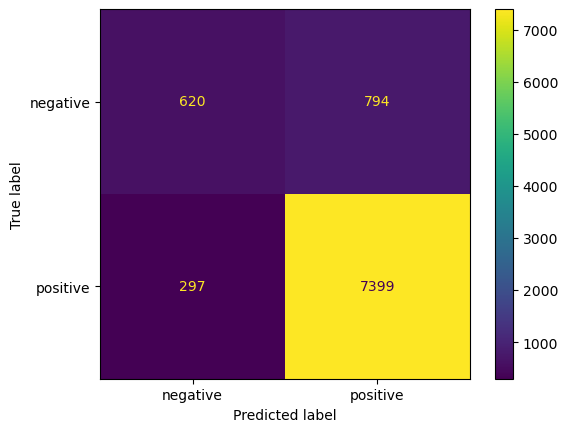

In [142]:
# confusion matrix for the logistic regression model
cm = confusion_matrix(y_test, y_test_log_reg_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

In [96]:
# precision for the logistic regression model
precision_log_reg = 749/(749 + 300)
precision_log_reg

0.7140133460438512

In [97]:
# recall for the logistic regression model
recall_log_reg = 749/(749 + 674)
recall_log_reg

0.5263527758257203

In [99]:
from sklearn.metrics import f1_score

# f1-score for baseline model
# Assuming y_test and y_test_baseline_predictions contain the actual labels and predictions respectively
f1_score_baseline_model = f1_score(y_test, y_test_baseline_predictions, average='weighted')
f1_score_baseline_model


0.0

In [102]:
from sklearn.metrics import f1_score

# f1-score for logistic regression model
# Assuming y_test and y_test_log_reg_predictions contain the actual labels and predictions respectively
f1_score_log_reg = f1_score(y_test, y_test_log_reg_predictions, pos_label='negative')
f1_score_log_reg


0.531960531960532

In [104]:
# results for logistic regression model
print("Logistic Regression: {'accuracy':", cross_val_accuracy_log_reg, " 'precision':", precision_log_reg, " 'recall':", recall_log_reg, 
          " 'f1-score':", f1_score_log_reg, "}")

Logistic Regression: {'accuracy': 0.8747588802634674  'precision': 0.7140133460438512  'recall': 0.5263527758257203  'f1-score': 0.531960531960532 }


In [107]:
y_test.value_counts()

Label
positive    7696
negative    1414
Name: count, dtype: int64

In [108]:
# % of positive sentiment labels in the test set
6994/(6994 + 1423)

0.8309373886182726

# Use the Best Model to Predict Sentiments

In [109]:
# The predict dataset that we read in Task 1
predict_data

,Id,Text
0,1,"The candy is tasty, but they totally scam you ..."
1,2,I had been looking for the violet candy with t...
2,3,these are very pricey so i only enjoy them now...
3,4,"These candies have a mild flavor, when compare..."
4,5,This product is a bit pricey for the amt. rece...


In [146]:
# Extract the review texts
predict_reviews = predict_data["Text"]

In [147]:
# create BOW for predict dataset
predict_reviews_BOW = vectorizer.transform(predict_reviews)

# predict using log_reg object
reviews_log_reg_predictions = log_reg.predict(predict_reviews_BOW)

# view the predictions
reviews_log_reg_predictions

array(['positive', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

In [148]:
results_df = pd.DataFrame(predict_data, columns=['Id', 'Text'])
results_df["Model Prediction"] = reviews_log_reg_predictions
center_aligned_results = results_df.style.set_properties(**{'text-align': 'center'}).hide(axis='index').set_table_styles([dict(selector = 'th', props=[('text-align', 'center')])])
center_aligned_results

Id,Text,Model Prediction
1,"The candy is tasty, but they totally scam you on the price. The jar is only the size of a soda can, and looks absolutely nothing like the picture. I will not be buying this again. If your gonna sell something that small make the price around $5.",positive
2,I had been looking for the violet candy with the perfect balance of sweet and floral when I tried these.The search has ended.I am very pleased.,positive
3,"these are very pricey so i only enjoy them now and then as a treat but the flavor is wonderfull and the packaging is very nice. would make a wonderfull gift to send to someone who likes such dainties.i will order again when i run out, truly a nice treat.",positive
4,"These candies have a mild flavor, when compared with CHoward's Violet candy, but they are delicious nevertheless. I will definitely purchase these candies again.",positive
5,"This product is a bit pricey for the amt. received. But,I wanted the candy I chain sucked through Paris and Ifound it. Delivery was also quicker than I expected.",positive


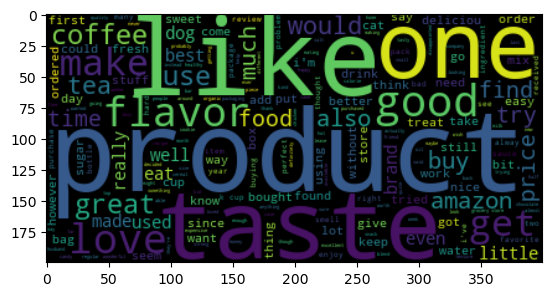

In [150]:
# word cloud for frequent words in review dataset
reviews = df["Text"]
complete_text = " ".join(reviews)
all_reviews_word_cloud = WordCloud(stopwords=stopwords.words('english')).generate(complete_text)
plt.imshow(all_reviews_word_cloud, interpolation='bilinear')

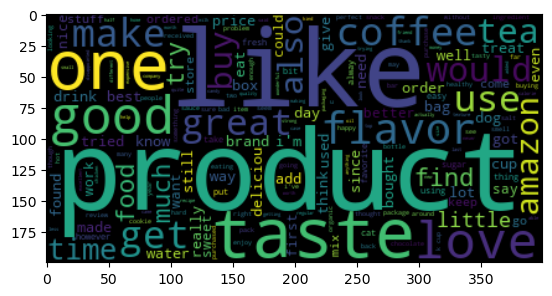

In [116]:
# word cloud for frequent words in training set used to train the logistic regression model
# we are not extending stop words to ignore any additional words
training_set_text = " ".join(X_train)
training_set_word_cloud = WordCloud(stopwords=stopwords.words('english')).generate(training_set_text)
plt.imshow(training_set_word_cloud, interpolation='bilinear');

# Which words classify a review as positive or negative

In [117]:
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

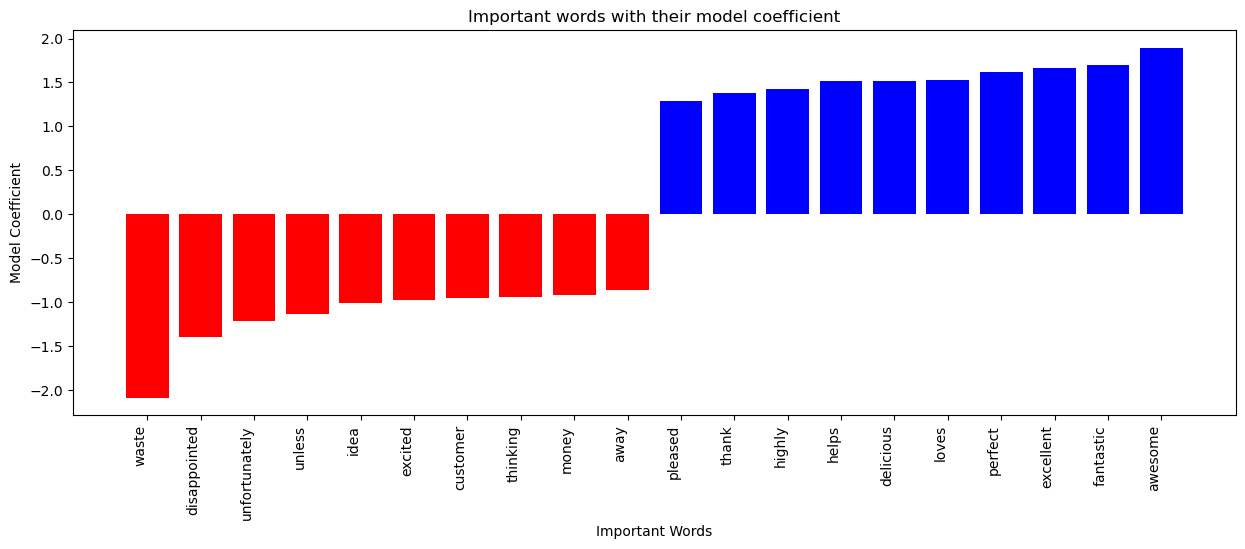

In [118]:
plot_coefficients(log_reg, vectorizer.get_feature_names_out())

# Classification with Unbalanced Data

# unersampling

In [120]:
# Define number of samples to use 
total_samples = 700

In [122]:
# extract the samples
review_samples = df.groupby(["Label"]).sample(n=(total_samples)//2, random_state=10)
review_samples.reset_index(drop=True, inplace=True)
review_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      700 non-null    int64 
 1   ProductId               700 non-null    object
 2   UserId                  700 non-null    object
 3   ProfileName             700 non-null    object
 4   HelpfulnessNumerator    700 non-null    int64 
 5   HelpfulnessDenominator  700 non-null    int64 
 6   Score                   700 non-null    int64 
 7   Time                    700 non-null    int64 
 8   Summary                 700 non-null    object
 9   Text                    700 non-null    object
 10  Label                   700 non-null    object
dtypes: int64(5), object(6)
memory usage: 60.3+ KB


In [123]:
review_samples.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,124653,B002OG4ZBS,A19RGAJQK1V72M,Marijan Bankovic,0,0,2,1351036800,"Good taste, but very hard, even sharp",i really wanted to get these as take away snac...,negative
1,467905,B000JL6OG4,AD2HP5A6O72DG,Ulfberht,0,0,2,1349308800,Taste and point of view,i tried this tea on recommendation in homeland...,negative
2,509037,B004X5UF4O,AQZ9FQYW60HJ4,Home schooler,0,0,1,1347408000,Bearnaise sauce -- not,i love sauce bearnaise it's not actually hard ...,negative
3,508819,B001IZHZR2,A3TAS1AG6FMBQW,"Jeri Zerr ""formerly a Road Rarrior of the Nth...",0,0,1,1347753600,petroleum derived FD&C Blue 1 = extreme GI dis...,over the years my parents would send me to sch...,negative
4,195515,B006G7Z5WE,A5BRO0WY8TQ46,CAM in PA,0,0,1,1351123200,WE LOVE POP CHIPS!,we love pop chips pop chips are the best snack...,negative


In [124]:
review_samples["Label"].value_counts()

Label
negative    350
positive    350
Name: count, dtype: int64

In [125]:
# shuffle the labelled_data
review_samples = review_samples.sample(frac=1, random_state=10)

In [126]:
review_samples.shape

(700, 11)